<a href="https://colab.research.google.com/github/Nithinan-Srikongphan/bsc_dpdm24/blob/main/TestData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จาก Data แสดงการเตรียม้อมูล แบ่งข้อมูล รวมถึงสร้าง (วาดรูป และ แสดงขั้นตอนการ train และการคำนวณในแต่ละขั้นลงในคำตอบ) เปรียบเทียบ Machine Learning Models ที่กำหนดให้ และรายงานประสิทธิภาพที่เหมาะสมของ model ที่ดีที่สุดบนข้อมูลทดสอบ (test set 20%)
Model ที่ต้องนำมาเปรียบเทียบ
Machine Learning Models คู่ Setup ได้แก่
1. Decision Tree Classifier ใช้ Max_depth=3 และ Min_sample_leaf=2
2.Decision Tree Classifier ใช้ Max_depth=4 และ Max_features=3
3.Naive Bayes Classifier
4.K Nearest Neighbor ใช้ K=1
5.Perceptron ใช้ 2Epoch


In [4]:
# prompt: โหลดข้อมูลจากไดร์ฟ My Drive ชื่อ Test.xlsx พร้อมแสดงข้อมูล

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split

# Replace 'Your spreadsheet name' with the actual name of your Excel file
file_path = '/content/drive/MyDrive/Test.xlsx'

try:
  df = pd.read_excel(file_path)
  print(df)
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      age  income student credit_rating  visit_time buys_computer
0    <=30    high     yes          fair        11.0            no
1     >40    high      no     excellent        12.0            no
2   31…40    high      no          fair        11.0            no
3   31…40     low     yes          fair        17.0           yes
4     >40  medium      no           NaN        14.0           yes
5    <=30     low     yes          fair        15.0           yes
6     >40     low     yes     excellent         NaN            no
7   31…40     low     yes     excellent        10.0           yes
8    <=30     NaN      no          fair        15.0            no
9    <=30     low     yes     excellent        12.0           yes
10    >40  medium     yes          fair        17.0           yes
11   <=30     low     yes     excellent        16.0           yes
12   <=30  me

In [5]:
# จัดการค่าหายไป โดยเติมด้วยค่า mode ของคอลัมน์
df["credit_rating"].fillna(df["credit_rating"].mode()[0], inplace=True)
df["income"].fillna(df["income"].mode()[0], inplace=True)
df["student"].fillna(df["student"].mode()[0], inplace=True)
df["visit_time"].fillna(df["visit_time"].median(), inplace=True)

# แก้ไขค่าผิดปกติในคอลัมน์ age
df["age"] = df["age"].replace({"31…40": "31-40"})

# แปลงค่าทั้งหมดในคอลัมน์ buys_computer ให้เป็นตัวพิมพ์เล็กก่อน
df["buys_computer"] = df["buys_computer"].str.lower()

# แปลงข้อมูล Categorical เป็นตัวเลข
mapping = {
    "age": {"<=30": 0, "31-40": 1, ">40": 2},
    "income": {"low": 0, "medium": 1, "high": 2},
    "student": {"no": 0, "yes": 1},
    "credit_rating": {"fair": 0, "excellent": 1},
    "buys_computer": {"no": 0, "yes": 1},
    }

for col, mapping_dict in mapping.items():
    df[col] = df[col].map(mapping_dict)


# แยก features (X) และ target (y)
X = df.drop(columns=["buys_computer"])
y = df["buys_computer"]

# แบ่ง Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# แสดงขนาดของชุดข้อมูลที่แบ่งแล้ว
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16, 5) Test shape: (4, 5)


<ipython-input-5-2958d6f21f10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["credit_rating"].fillna(df["credit_rating"].mode()[0], inplace=True)
<ipython-input-5-2958d6f21f10>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [6]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16, 5) Test shape: (4, 5)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            20 non-null     int64  
 1   income         20 non-null     int64  
 2   student        20 non-null     int64  
 3   credit_rating  20 non-null     int64  
 4   visit_time     20 non-null     float64
 5   buys_computer  20 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 KB
None


In [8]:
# prompt: เทรนโมเดล Decision Tree Classifier ใช้setup ดังนี้ Max_depth=3 และ Min_sample_leaf=2

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier with Max_depth=3 and Min_sample_leaf=2
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree (max_depth=3, min_samples_leaf=2) Accuracy: {accuracy_dt}")

Decision Tree (max_depth=3, min_samples_leaf=2) Accuracy: 0.5


Decision Tree (max_depth=3, min_samples_leaf=2) Accuracy: 0.5


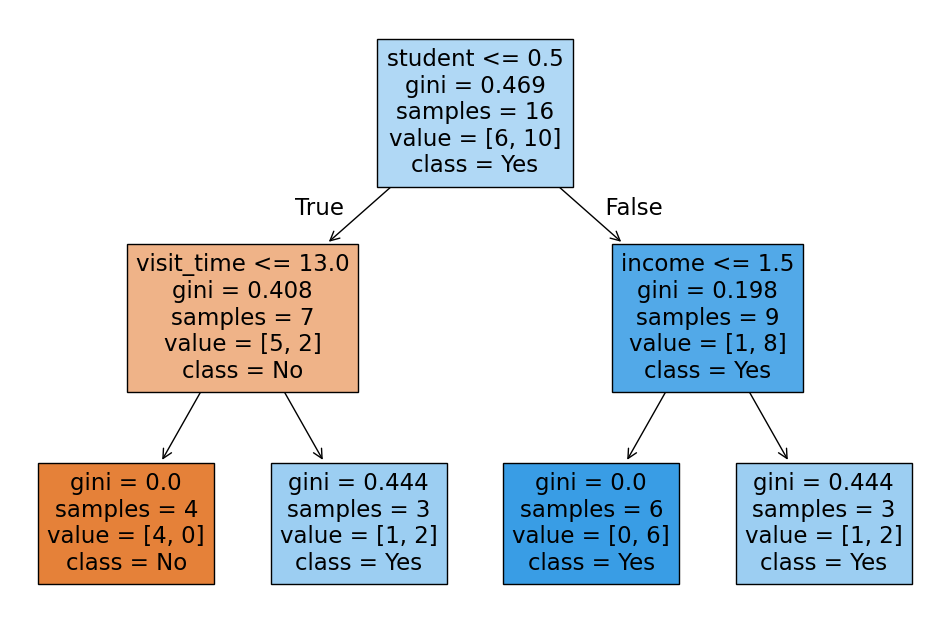

In [9]:
# prompt: แสดงแผนภาพ

from sklearn import tree
import matplotlib.pyplot as plt

# ... (your existing code)

# Decision Tree Classifier with Max_depth=3 and Min_sample_leaf=2
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree (max_depth=3, min_samples_leaf=2) Accuracy: {accuracy_dt}")


# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


Decision Tree (max_depth=4, max_features=3) Accuracy: 0.75


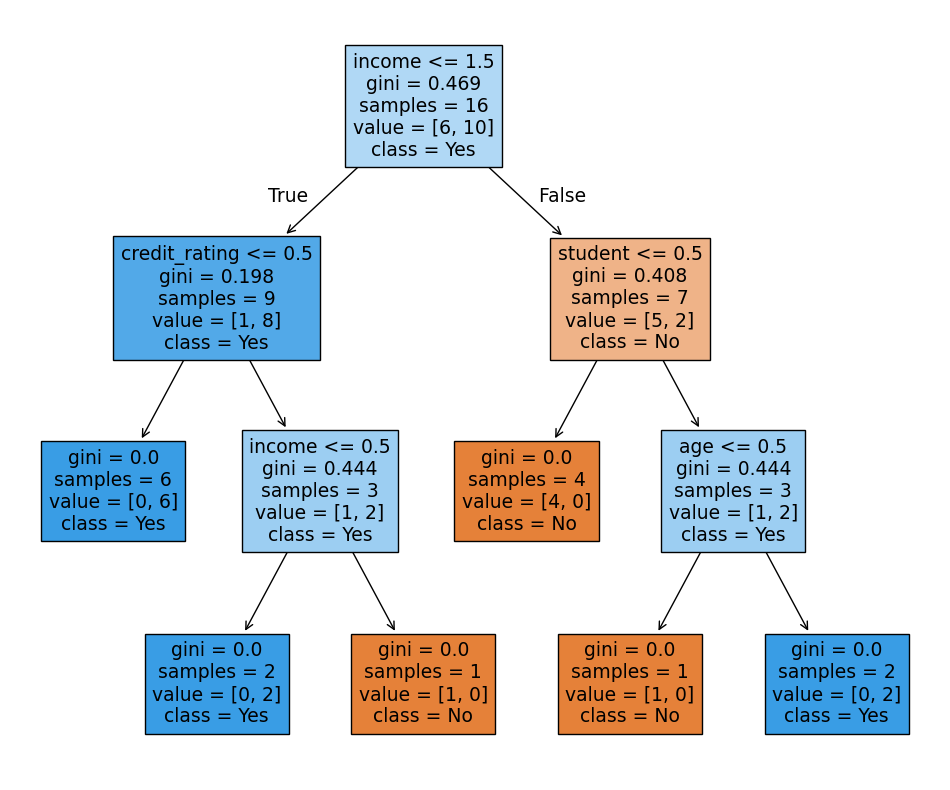

In [36]:
# prompt: เทรนโมเดล Decision Tree Classifier ใช้setup ดังนี้ Max_depth=4 และ Max_features=3

import matplotlib.pyplot as plt
# Decision Tree Classifier with Max_depth=4 and Max_features=3
dt_classifier_2 = DecisionTreeClassifier(max_depth=4, max_features=3)
dt_classifier_2.fit(X_train, y_train)
y_pred_dt_2 = dt_classifier_2.predict(X_test)
accuracy_dt_2 = accuracy_score(y_test, y_pred_dt_2)
print(f"Decision Tree (max_depth=4, max_features=3) Accuracy: {accuracy_dt_2}")

# Visualize the second decision tree
plt.figure(figsize=(12, 10))
tree.plot_tree(dt_classifier_2, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [37]:
# prompt: เทรนโมเดล Naive Bayes Classifier หา P(Ci) , P(X|Ci)

from sklearn.naive_bayes import CategoricalNB
from collections import Counter

# Initialize and train the Naive Bayes Classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Calculate P(Ci) for each class
class_counts = Counter(y_train)
total_samples = len(y_train)
prior_probabilities = {class_label: count / total_samples for class_label, count in class_counts.items()}
print("Prior Probabilities (P(Ci)):", prior_probabilities)

# Calculate P(X|Ci) -  likelihood for each feature given each class
# Note: CategoricalNB handles this internally, but we can demonstrate it here
for class_label in nb_classifier.classes_:
    print(f"\nLikelihoods P(X|C={class_label}):")
    for i in range(X_train.shape[1]):
        feature_counts = Counter(X_train.iloc[y_train.values == class_label, i])
        total_class_samples = class_counts[class_label]
        for feature_value, count in feature_counts.items():
            likelihood = count / total_class_samples
            print(f"  Feature {X_train.columns[i]} = {feature_value}: {likelihood}")


Naive Bayes Accuracy: 0.75
Prior Probabilities (P(Ci)): {1: 0.625, 0: 0.375}

Likelihoods P(X|C=0):
  Feature age = 0: 0.3333333333333333
  Feature age = 2: 0.5
  Feature age = 1: 0.16666666666666666
  Feature income = 2: 0.8333333333333334
  Feature income = 1: 0.16666666666666666
  Feature student = 1: 0.16666666666666666
  Feature student = 0: 0.8333333333333334
  Feature credit_rating = 0: 0.5
  Feature credit_rating = 1: 0.5
  Feature visit_time = 11.0: 0.3333333333333333
  Feature visit_time = 12.0: 0.3333333333333333
  Feature visit_time = 15.0: 0.16666666666666666
  Feature visit_time = 10.0: 0.16666666666666666

Likelihoods P(X|C=1):
  Feature age = 1: 0.4
  Feature age = 2: 0.3
  Feature age = 0: 0.3
  Feature income = 0: 0.4
  Feature income = 2: 0.2
  Feature income = 1: 0.4
  Feature student = 1: 0.8
  Feature student = 0: 0.2
  Feature credit_rating = 0: 0.8
  Feature credit_rating = 1: 0.2
  Feature visit_time = 17.0: 0.2
  Feature visit_time = 11.0: 0.1
  Feature visit_

In [46]:
# prompt: ถ้า X = (age<=30, income=medium,student=yes,credit=fair) จงหา P(X|Ci) และ P(X|Ci)*P(Ci)

import pandas as pd
from collections import Counter

# Assuming your DataFrame 'df' and the mapping dictionary are already defined as in the provided code.
# ... (your existing code)

# Define X for calculation
X_instance = pd.DataFrame({'age': [0], 'income': [1], 'student': [1], 'credit_rating': [0]})


# Calculate P(X|Ci) and P(X|Ci) * P(Ci) for Naive Bayes
for class_label in nb_classifier.classes_:
    print(f"\nCalculations for class C{class_label}:")
    p_x_given_ci = 1  # Initialize the probability
    for i in range(X_instance.shape[1]):
        feature_value = X_instance.iloc[0, i]
        # Access the feature counts from training data for given class
        feature_counts = Counter(X_train.iloc[y_train.values == class_label, i])
        total_class_samples = class_counts[class_label]

        # Calculate likelihood
        if feature_value in feature_counts:
          likelihood = feature_counts[feature_value] / total_class_samples
        else:
          likelihood = 0  # Handle unseen feature values (Laplace smoothing might be better)
        print(f"  P({X_train.columns[i]}={feature_value}|C={class_label}) = {likelihood}")
        p_x_given_ci *= likelihood

    p_ci = prior_probabilities[class_label]
    p_x_given_ci_times_pci = p_x_given_ci * p_ci
    print(f"  P(X|C={class_label}) = {p_x_given_ci}")
    print(f"  P(Ci) = {p_ci}")
    print(f"  P(X|C{class_label}) * P(C{class_label}) = {p_x_given_ci_times_pci}")



Calculations for class C0:
  P(age=0|C=0) = 0.3333333333333333
  P(income=1|C=0) = 0.16666666666666666
  P(student=1|C=0) = 0.16666666666666666
  P(credit_rating=0|C=0) = 0.5
  P(X|C=0) = 0.004629629629629629
  P(Ci) = 0.375
  P(X|C0) * P(C0) = 0.001736111111111111

Calculations for class C1:
  P(age=0|C=1) = 0.3
  P(income=1|C=1) = 0.4
  P(student=1|C=1) = 0.8
  P(credit_rating=0|C=1) = 0.8
  P(X|C=1) = 0.07680000000000001
  P(Ci) = 0.625
  P(X|C1) * P(C1) = 0.048


Naive Bayes Accuracy: 0.5


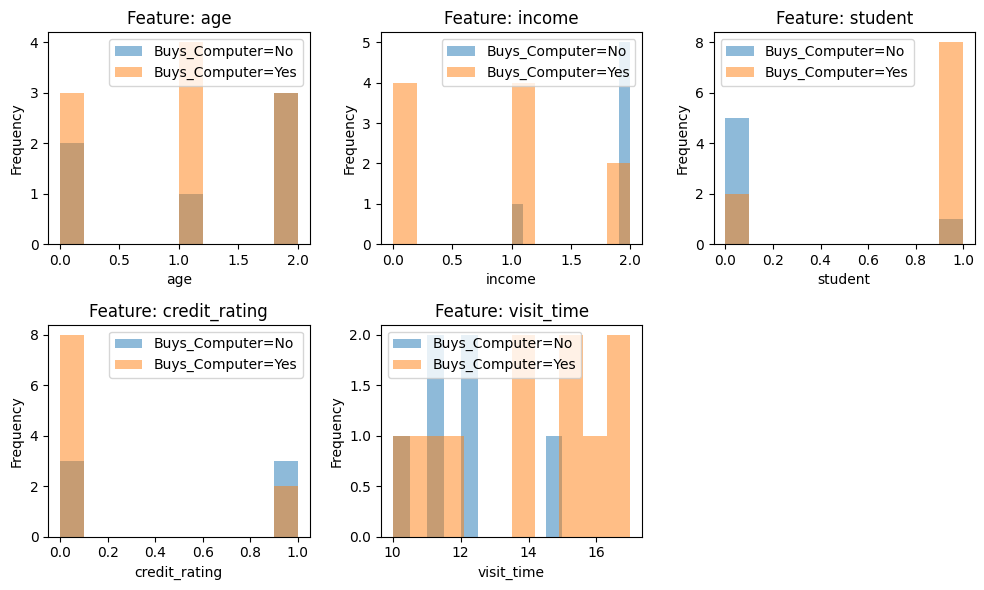

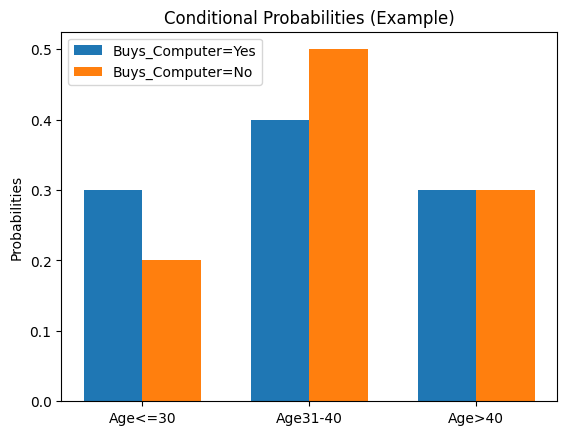

In [13]:
# prompt: เทรนโมเดล Naive Bayes Classifier พร้อมแสดงแผนภาพ Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Visualize Naive Bayes (Simplified representation)
# Note: Direct visualization of a Naive Bayes model's decision boundary is complex.
# This code provides a simplified visualization of class probabilities for each feature.

plt.figure(figsize=(10, 6))

for i in range(X.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.hist(X_train[y_train == 0].iloc[:, i], alpha=0.5, label='Buys_Computer=No')
    plt.hist(X_train[y_train == 1].iloc[:, i], alpha=0.5, label='Buys_Computer=Yes')
    plt.xlabel(X.columns[i])
    plt.ylabel("Frequency")
    plt.title(f"Feature: {X.columns[i]}")
    plt.legend()

plt.tight_layout()
plt.show()


# Example of how to represent the probabilities using a theoretical example.
# Replace this with your actual probabilities from the model.

# Assume these are the class prior probabilities for "Buys_Computer" = Yes/No.
prior_prob_yes = 0.6
prior_prob_no = 0.4

# Example feature probabilities (replace with actual probabilities from nb_classifier).
# Example of the conditional probabilities P(Feature | Buys_Computer)
feature_prob = {
    "Age<=30": {"yes": 0.3, "no": 0.2},
    "Age31-40": {"yes": 0.4, "no": 0.5},
    "Age>40": {"yes": 0.3, "no": 0.3},
    # Add more features and their probabilities
}

# Plotting the probabilities (example for 1 feature)

# Example for visualizing for Age<=30

age_categories = ["Age<=30","Age31-40","Age>40"]
yes_prob = [feature_prob[cat]["yes"] for cat in age_categories]
no_prob = [feature_prob[cat]["no"] for cat in age_categories]
x = np.arange(len(age_categories))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes_prob, width, label='Buys_Computer=Yes')
rects2 = ax.bar(x + width/2, no_prob, width, label='Buys_Computer=No')

ax.set_ylabel('Probabilities')
ax.set_title('Conditional Probabilities (Example)')
ax.set_xticks(x)
ax.set_xticklabels(age_categories)
ax.legend()

plt.show()


Naive Bayes Accuracy: 0.5


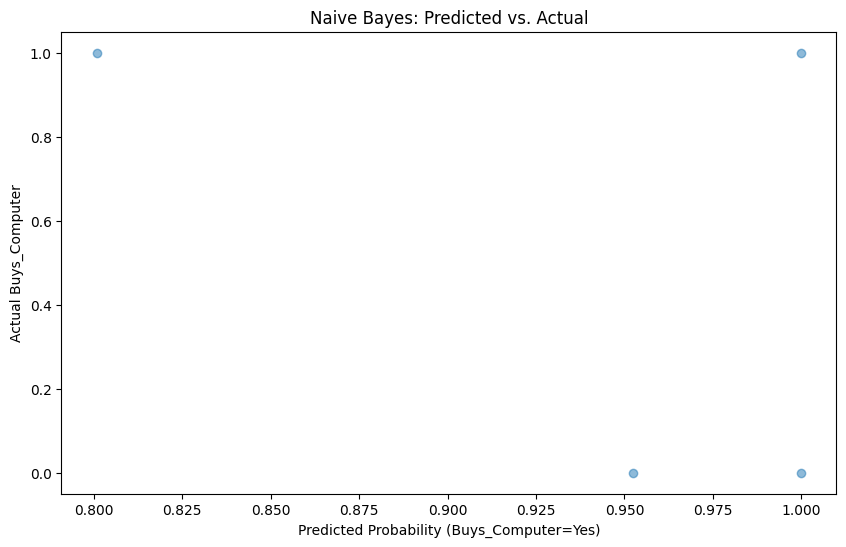

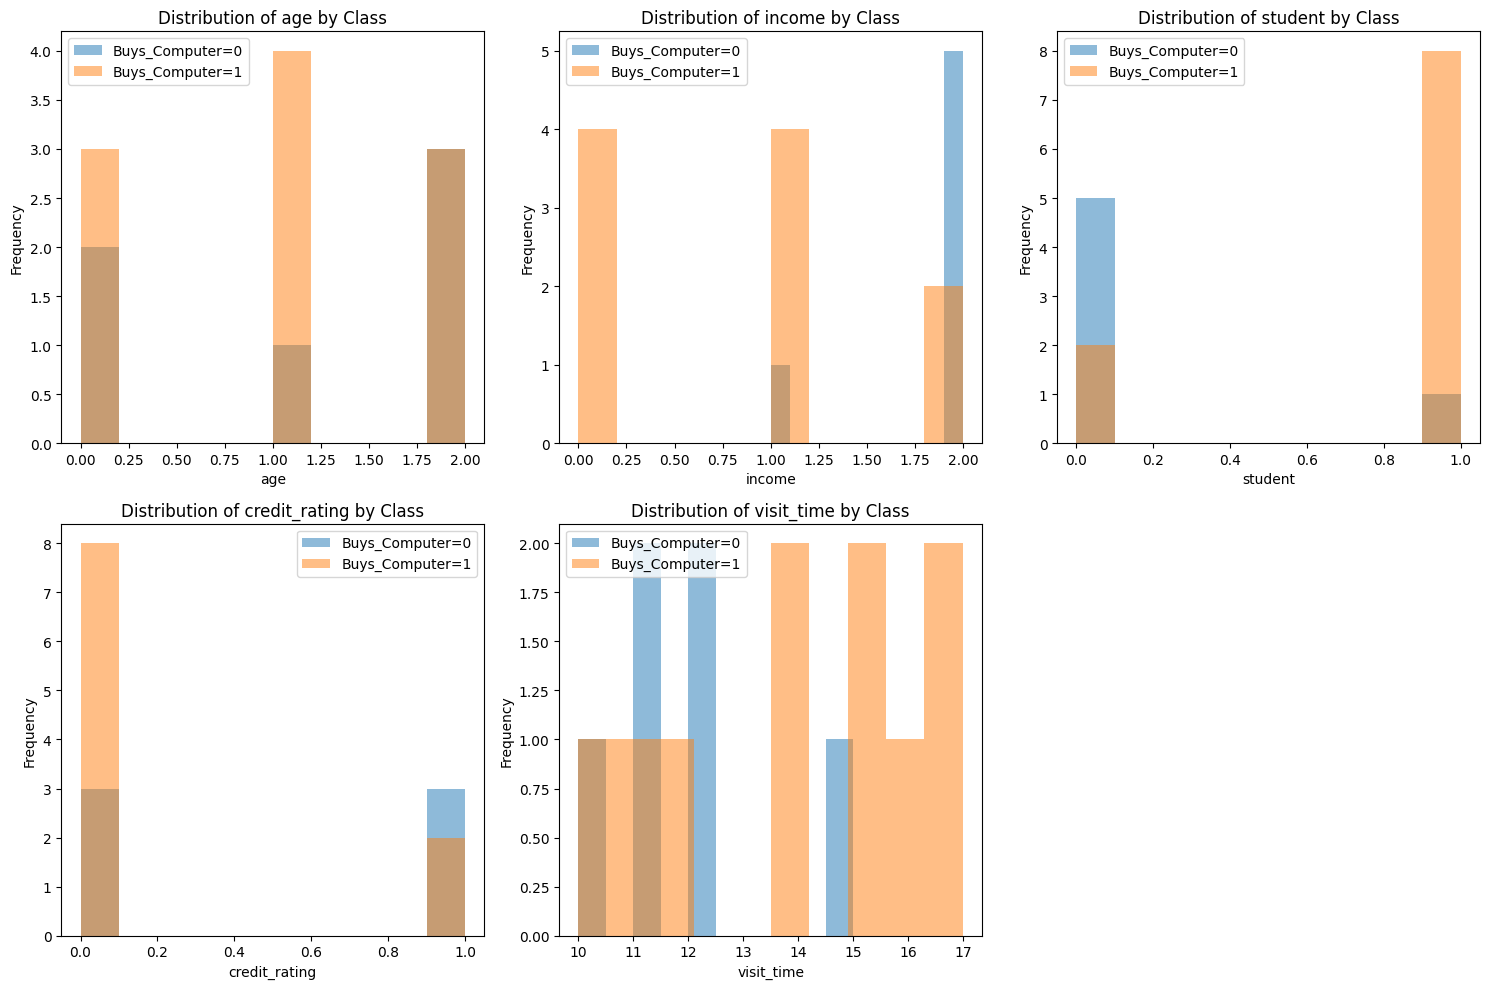

In [16]:
# prompt: naive bayes classifier chart

import matplotlib.pyplot as plt
# ... (your existing code)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Visualize Naive Bayes (Scatter plot of predicted probabilities)
plt.figure(figsize=(10, 6))

# Get predicted probabilities for the positive class (buys_computer = 1)
predicted_probabilities = nb_classifier.predict_proba(X_test)[:, 1]

# Scatter plot of predicted probabilities vs. actual values
plt.scatter(predicted_probabilities, y_test, alpha=0.5)
plt.xlabel("Predicted Probability (Buys_Computer=Yes)")
plt.ylabel("Actual Buys_Computer")
plt.title("Naive Bayes: Predicted vs. Actual")
plt.show()

# --- Additional Visualization for Naive Bayes ---

# Visualize the distribution of each feature for each class
plt.figure(figsize=(15, 10))

for i, feature in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid based on the number of features
    for class_label in y.unique():
        plt.hist(X_train[y_train == class_label][feature], alpha=0.5, label=f"Buys_Computer={class_label}")
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


KNN (K=1) Accuracy: 0.5


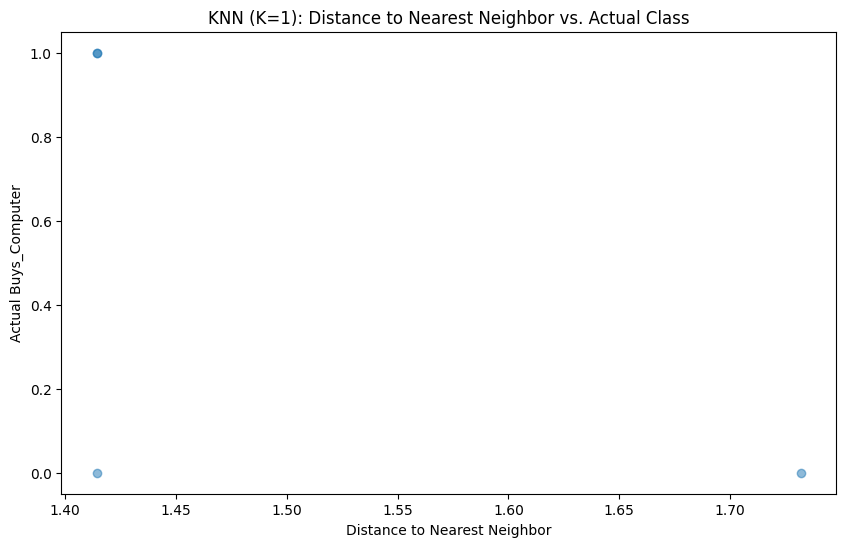

In [28]:
# prompt: เทรนโมเดล K Nearest Neighbor ใช้ K=1

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbor with K=1
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN (K=1) Accuracy: {accuracy_knn}")

# Visualization for KNN (Scatter plot of distances to neighbors)
# Note: This visualization provides insights into the model's decision-making process.
# It is useful to see how close the data point is to the k nearest neighbors.
plt.figure(figsize=(10, 6))

# Get distances to the nearest neighbor for each test data point.
distances, indices = knn_classifier.kneighbors(X_test)

# Plot the distance to the nearest neighbor against the actual class label.
plt.scatter(distances[:, 0], y_test, alpha=0.5)
plt.xlabel("Distance to Nearest Neighbor")
plt.ylabel("Actual Buys_Computer")
plt.title("KNN (K=1): Distance to Nearest Neighbor vs. Actual Class")
plt.show()


In [27]:
# prompt: เทรนโมเดล Perceptron โดยใช้ 2Epoch

from sklearn.linear_model import Perceptron

# Perceptron with 2 epochs
perceptron = Perceptron(max_iter=2)  # Set max_iter to 2 for 2 epochs
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f"Perceptron (2 epochs) Accuracy: {accuracy_perceptron}")

Perceptron (2 epochs) Accuracy: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [33]:
# prompt: แสดง โมเดล Perceptron ที่หาได้

# Print the learned Perceptron model's coefficients and intercept.
print("Perceptron Model Coefficients:", perceptron.coef_)
print("Perceptron Model Intercept:", perceptron.intercept_)


Perceptron Model Coefficients: [[  0. -10.   4.  -2.   8.]]
Perceptron Model Intercept: [-1.]


XOR Accuracy (based on X1 XOR X2): 0.4


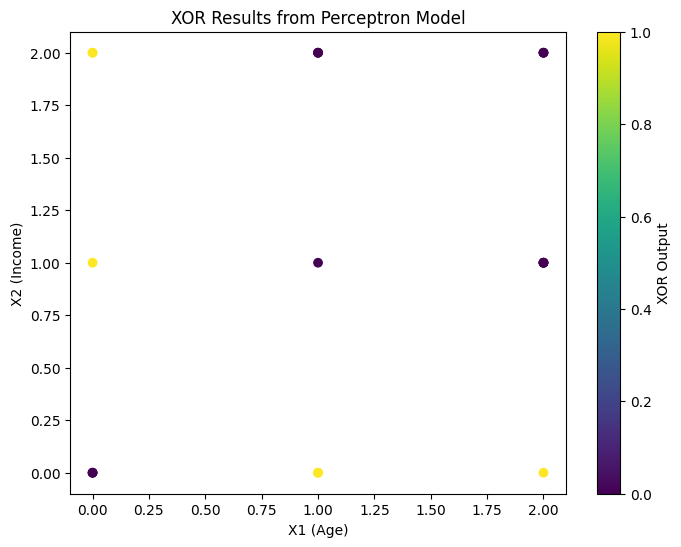

In [35]:
# prompt: หา XOR จาก โมเดล Perceptron ได้แก่ X1 X2 Y

import matplotlib.pyplot as plt
import numpy as np
# Extract X1, X2, and Y from the DataFrame
X1 = X['age']
X2 = X['income']
Y = y

# Calculate XOR using the Perceptron model's predictions
y_pred_perceptron_xor = np.logical_xor(X1,X2)

# Compare the XOR results with the actual Y values
xor_accuracy = np.mean(y_pred_perceptron_xor == Y)
print(f"XOR Accuracy (based on X1 XOR X2): {xor_accuracy}")

# Assuming you want to visualize XOR results
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, c=y_pred_perceptron_xor, cmap='viridis')  # Color points by XOR result
plt.title('XOR Results from Perceptron Model')
plt.xlabel('X1 (Age)')
plt.ylabel('X2 (Income)')
plt.colorbar(label='XOR Output')
plt.show()

